# Load Data

In [1]:
# import modules
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# # read data
df = pd.read_csv('data-raw.csv', delimiter='\t')

# Data Analysis

In [3]:
# drop unnecessary column after manual checking
df = df.drop(df.columns[50:], axis=1)

In [4]:
# check whether there are null value in the dataset
df.isnull().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

In [5]:
# drop null
df.dropna(inplace=True)

In [6]:
# questions for each groups
EXT_Questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

EST_Questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

AGR_Questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

CSN_Questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

OPN_Questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [7]:
# group names and columns
Extroversion = [column for column in df if column.startswith('EXT')]
Neuroticism = [column for column in df if column.startswith('EST')]
Agreeableness = [column for column in df if column.startswith('AGR')]
Conscientiousness = [column for column in df if column.startswith('CSN')]
Openness_to_Experience = [column for column in df if column.startswith('OPN')]

In [8]:
# define function to visualize data
def vis_questions(groupname, questions, color):
  plt.figure(figsize=(40,50))
  for i in range(1,11):
    plt.subplot(10,5,i)
    plt.hist(df[groupname[i-1]], bins=14, color=color, alpha=0.5)
    plt.title(questions[groupname[i-1]], fontsize=20)

Extroversion Personality


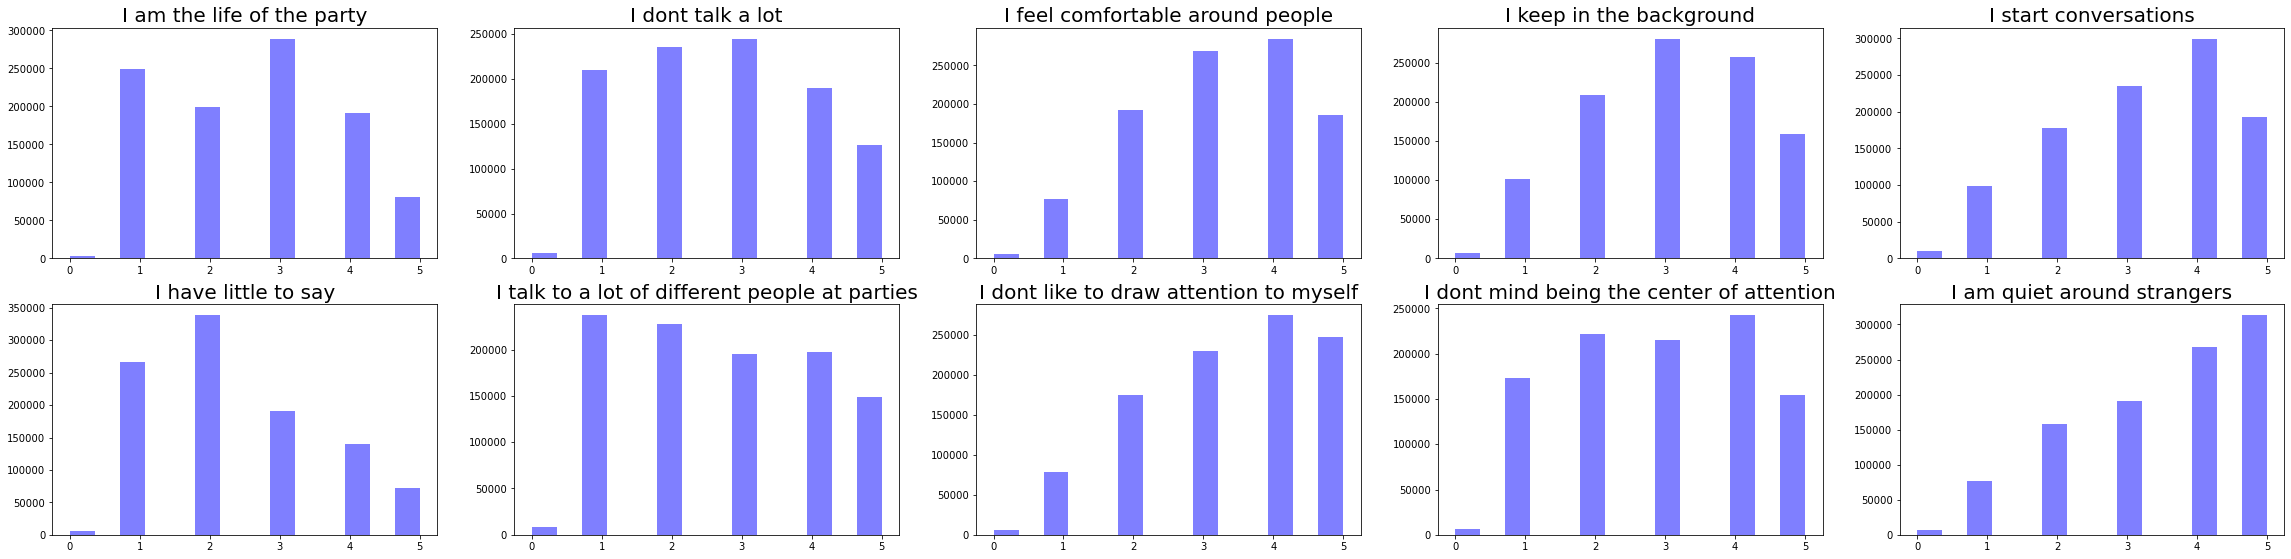

In [9]:
# visualization from EXT data
print('Extroversion Personality')
vis_questions(Extroversion, EXT_Questions, 'blue')

Neuroticism Personality


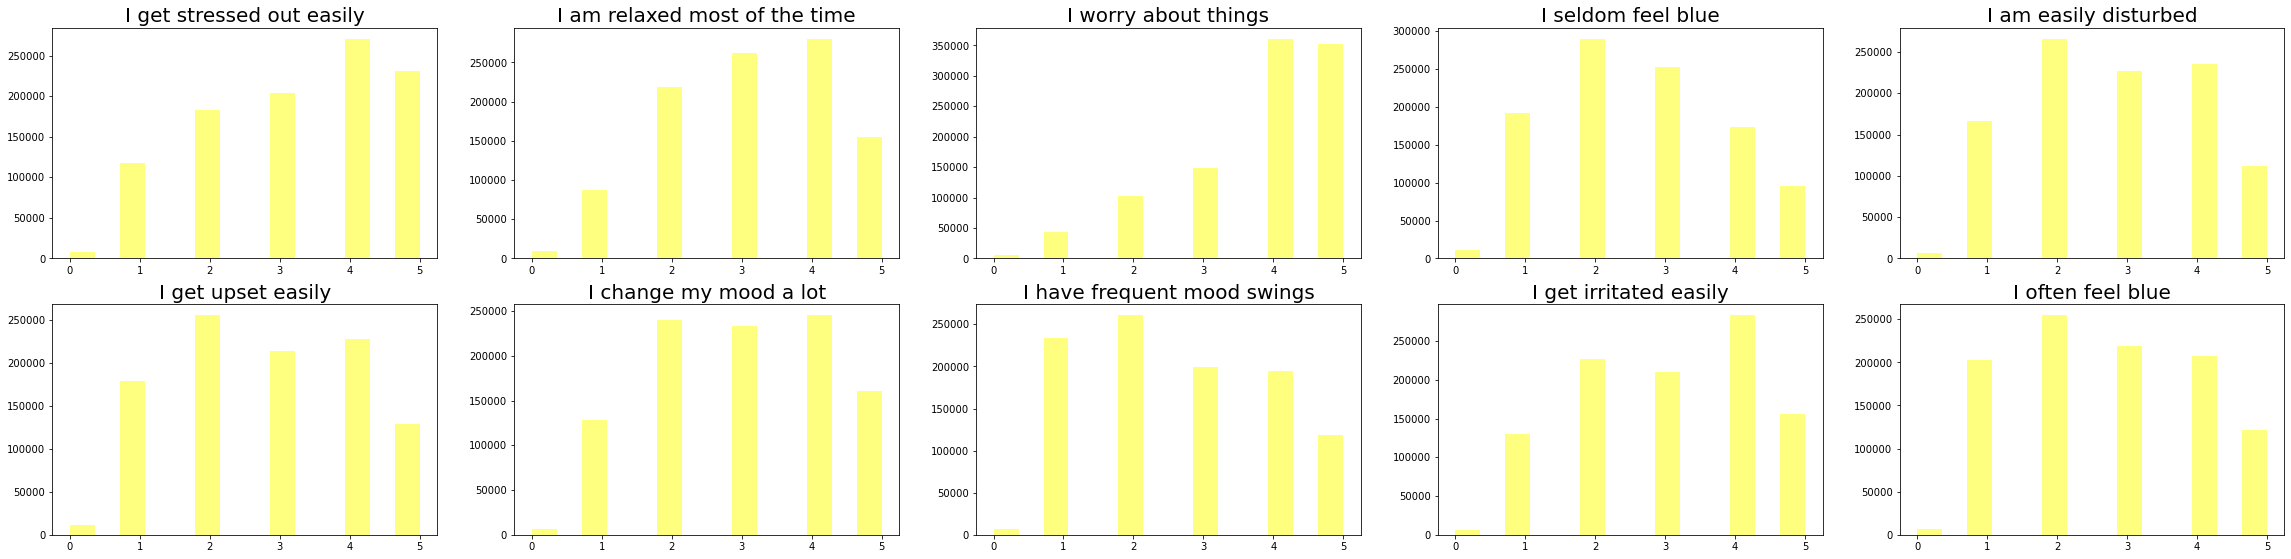

In [10]:
# visualization from EST data
print('Neuroticism Personality')
vis_questions(Neuroticism, EST_Questions, 'yellow')

Agreeableness Personality


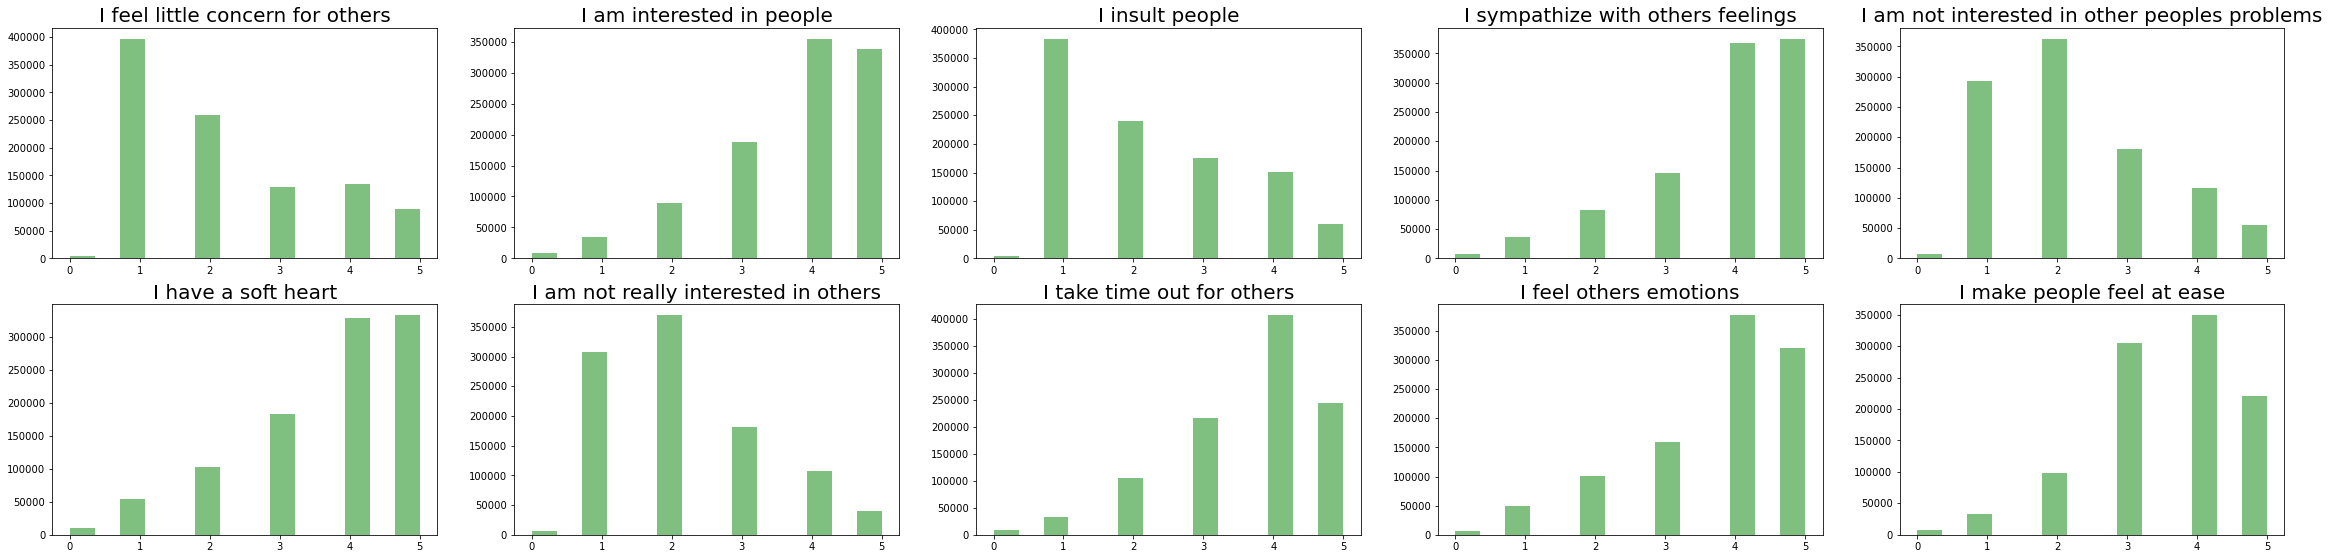

In [11]:
# visualization from AGR data
print('Agreeableness Personality')
vis_questions(Agreeableness, AGR_Questions, 'green')

Conscientiousness Personality


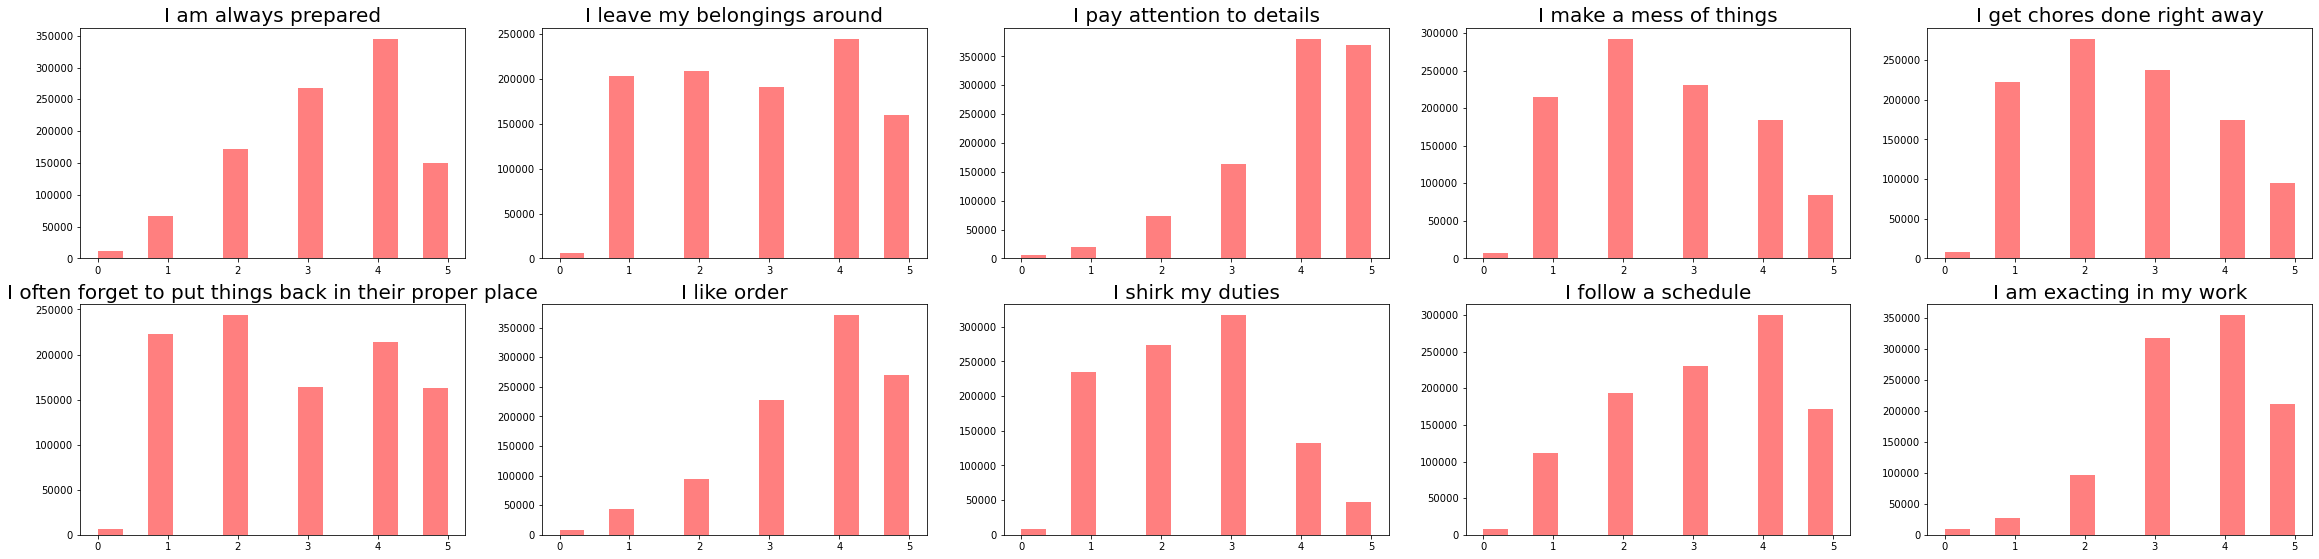

In [12]:
# visualization from CSN data
print('Conscientiousness Personality')
vis_questions(Conscientiousness, CSN_Questions, 'red')

Openness to Experience Personality


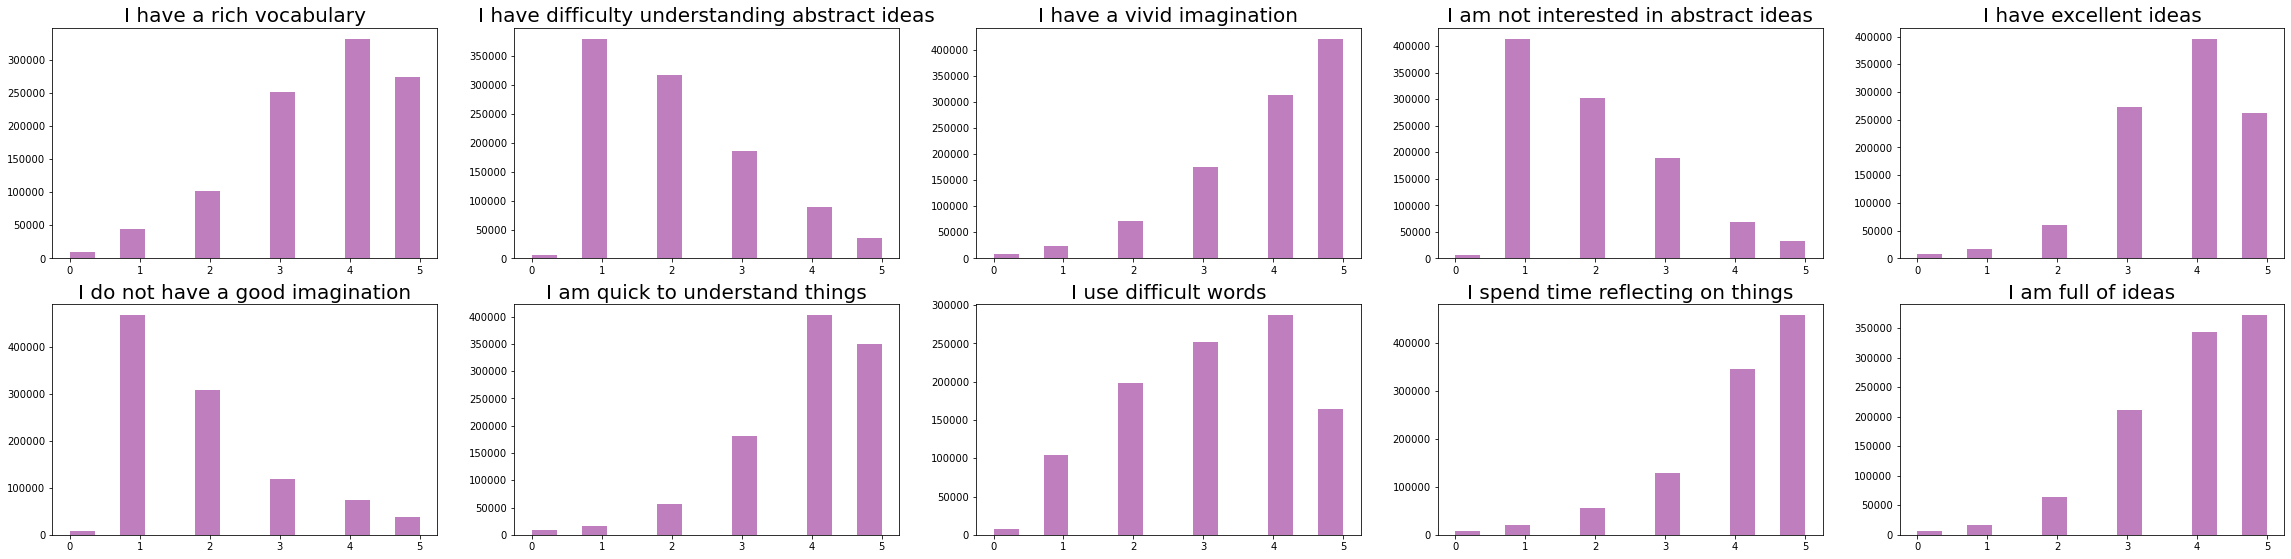

In [13]:
# visualization from OPN data
print('Openness to Experience Personality')
vis_questions(Openness_to_Experience, OPN_Questions, 'purple')

# Cluster based on Personality test's key

In [14]:
# key source: 
for index, row in df.iterrows():
    e = 20 + row.EXT1 - row.EXT6 + row.EST1 - row.EST6 + row.AGR1 - row.AGR6 + row.CSN1 - row.CSN6 + row.OPN1 - row.OPN6
    a = 14 - row.EXT2 + row.EXT7 - row.EST2 + row.EST7 - row.AGR2 + row.AGR7 - row.CSN2 + row.CSN7 + row.OPN2 + row.OPN7
    c = 14 + row.EXT3 - row.EXT8 + row.EST3 - row.EST8 + row.AGR3 - row.AGR8 + row.CSN3 - row.CSN8 + row.OPN3 + row.OPN8
    n = 38 - row.EXT4 + row.EXT9 - row.EST4 + row.EST9 - row.AGR4 - row.AGR9 - row.CSN4 - row.CSN9 - row.OPN4 - row.OPN9
    o = 8 + row.EXT5 - row.EXT10 + row.EST5 - row.EST10 + row.AGR5 - row.AGR10 + row.CSN5 + row.CSN10 + row.OPN5 - row.OPN10
    varmax = {e:"E",a:"A",c:"C",n:"N",o:"O"}
    df.at[index,'Personality']  = varmax.get(max(varmax))

In [15]:
print(df.groupby('Personality').count())

               EXT1    EXT2    EXT3    EXT4    EXT5    EXT6    EXT7    EXT8  \
Personality                                                                   
A            142639  142639  142639  142639  142639  142639  142639  142639   
C            480886  480886  480886  480886  480886  480886  480886  480886   
E            258033  258033  258033  258033  258033  258033  258033  258033   
N            129814  129814  129814  129814  129814  129814  129814  129814   
O              2186    2186    2186    2186    2186    2186    2186    2186   

               EXT9   EXT10  ...    OPN1    OPN2    OPN3    OPN4    OPN5  \
Personality                  ...                                           
A            142639  142639  ...  142639  142639  142639  142639  142639   
C            480886  480886  ...  480886  480886  480886  480886  480886   
E            258033  258033  ...  258033  258033  258033  258033  258033   
N            129814  129814  ...  129814  129814  129814  129814  

In [18]:
# because of the unequal distribution, we decided to use clustering instead of using the personality test's key
df = df.drop('Personality', axis=1)

# Clustering

In [19]:
# import module
from sklearn.cluster import KMeans

# clustering into 5 personality groups
df_model=df
K_Means=KMeans(n_clusters=5)
k_fit=K_Means.fit(df_model)

In [20]:
# predicting the clusters
pd.options.display.max_columns=10
pred=k_fit.labels_
df['Clusters'] = pred
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,4
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,1
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,1
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4


In [21]:
# display the spread of values for each cluster
df.Clusters.value_counts()

0    227177
1    212961
4    209794
3    200606
2    163020
Name: Clusters, dtype: int64

In [22]:
# summing up the different questions groups
col_list=list(df_model)
EXT = col_list[0:10]
EST = col_list[10:20]
AGR = col_list[20:30]
CSN = col_list[30:40]
OPN = col_list[40:50]

data_sum=pd.DataFrame()
data_sum['Extroversion']=df_model[EXT].sum(axis=1)/10
data_sum['Neuroticism']=df_model[EST].sum(axis=1)/10
data_sum['Agreeableness']=df_model[AGR].sum(axis=1)/10
data_sum['Conscientiousness']=df_model[CSN].sum(axis=1)/10
data_sum['Openness to Experience']=df_model[OPN].sum(axis=1)/10
data_sum['Clusters']=pred
data_sum.groupby('Clusters').mean()

,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness to Experience
Clusters,,,,,
0,3.072327,3.426615,3.300166,3.211541,3.352352
1,3.052160,2.981235,3.187263,3.158438,3.243000
2,2.908889,2.527092,2.851134,2.914518,3.120609
3,2.966136,3.646433,3.149121,3.173489,3.245736
4,3.085423,2.423058,3.208954,3.106746,3.327374


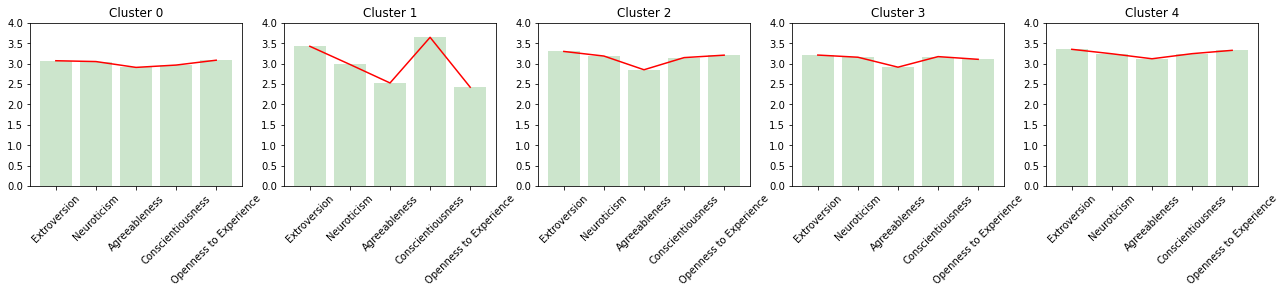

In [23]:
# visualize the mean for each cluster
data_clusters = data_sum.groupby('Clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

# One Hot Encoding

In [24]:
# import module
from sklearn.preprocessing import LabelBinarizer

# one hot encoding for 5 types -> 5 columns
y = LabelBinarizer().fit_transform(df.Clusters)
y = pd.DataFrame(y, columns = ['0','1','2','3','4'])

In [25]:
# count each label
count_label = tf.reduce_sum(y, axis=0)
for i in range(len(count_label) ):
    print("{} {}".format(y.columns[i], count_label[i]))

0 227177
1 212961
2 163020
3 200606
4 209794


# ANN

In [26]:
from sklearn.model_selection import train_test_split

# define label
x = df.drop('Clusters', axis=1)
y.astype(int)

# split dataframe 80% train, 20% test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.1, random_state=43)

In [27]:
# rescale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# train
train_x = scaler.fit_transform(train_x.astype(np.float64))
# test
test_x = scaler.fit_transform(test_x.astype(np.float64))

In [28]:
# neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, epochs =5)

Epoch 1/5
28507/28507 [==============================] - 26s 896us/step - loss: 0.1566 - accuracy: 0.9367
Epoch 2/5
28507/28507 [==============================] - 27s 947us/step - loss: 0.0972 - accuracy: 0.9588s -
Epoch 3/5
28507/28507 [==============================] - 25s 879us/step - loss: 0.0863 - accuracy: 0.9634
Epoch 4/5
28507/28507 [==============================] - 21s 723us/step - loss: 0.0792 - accuracy: 0.9664s - loss: 0.0793 - accuracy
Epoch 5/5
28507/28507 [==============================] - 20s 704us/step - loss: 0.0740 - accuracy: 0.9685


# Evaluate the Model

In [29]:
# evaluate
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print(test_loss, test_accuracy)

3168/3168 [==============================] - 1s 439us/step - loss: 0.0609 - accuracy: 0.9720
0.06090446561574936 0.9719997048377991


In [30]:
#try prediction
pred = model.predict([[2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3]])
print(pred)

[[1.000000e+00 0.000000e+00 0.000000e+00 5.399212e-29 0.000000e+00]]


# Export to TFLite Model

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)